## Retrieve Classified Data

In [1]:
import data
from data import DataLoader, DataPaths, DataEncodings
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from tensorflow.data import Dataset
import numpy as np
from tensorflow.errors import ResourceExhaustedError
from tensorflow.data import AUTOTUNE
import tensorflow.keras as ks


2025-04-30 23:42:32.926388: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746070952.939313  941324 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746070952.943285  941324 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746070952.954331  941324 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746070952.954341  941324 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746070952.954343  941324 computation_placer.cc:177] computation placer alr

In [2]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
def plot_loss(history):
  plt.figure(figsize=(16, 8))
  plt.subplot(1, 2, 1)
  plot_graphs(history, 'accuracy')
  plt.ylim(None, 1)
  plt.subplot(1, 2, 2)
  plot_graphs(history, 'loss')
  plt.ylim(0, None)

In [3]:
# Initialize data loader
data_loader = DataLoader()
data_encoder = data.DataEncoder(1000)
# Load spam data
spam_data = data_loader.load_data(DataPaths.SPAM_SALES_DATA)

[nltk_data] Downloading package punkt to /home/oguntola/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/oguntola/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/oguntola/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
data_loader.raw_text

0        Subject: enron methanol ; meter # : 988291\r\n...
1        Subject: hpl nom for january 9 , 2001\r\n( see...
2        Subject: neon retreat\r\nho ho ho , we ' re ar...
3        Subject: photoshop , windows , office . cheap ...
4        Subject: re : indian springs\r\nthis deal is t...
                               ...                        
19602                             :( but your not here....
19603    Becoz its  &lt;#&gt;  jan whn al the post ofic...
19604    Its a valentine game. . . send dis msg to all ...
19605                                We r outside already.
19606    The Xmas story is peace.. The Xmas msg is love...
Name: text, Length: 19607, dtype: object

In [5]:

text, is_spam, text_class = data_loader.get_processed_data(concat=False)
cleaned_text = data_loader.get_processed_text_as_strings()
label_encoder = LabelEncoder()


def tensorflow_dataset(data, labels):
    """
    Create a TensorFlow dataset from the text and labels.
    """
    dataset = Dataset.from_tensor_slices((
            data,
            label_encoder.fit_transform(labels)   # Labels
    ))

    train_size = int(len(text) * 0.9)
    train_dataset = dataset.take(train_size)
    test_dataset = dataset.skip(train_size)

    # Specify output types
    train_dataset = train_dataset.map(lambda x, y: (x, y))  # Map to appropriate data types
    test_dataset = test_dataset.map(lambda x, y: (x, y))  # Map to appropriate data types
    
    train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(AUTOTUNE)
    test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(AUTOTUNE)
    
    return train_dataset, test_dataset

BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [6]:
text

array(["Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes .",
       'Subject: hpl nom for january 9 , 2001\r\n( see attached file : hplnol 09 . xls )\r\n- hplnol 09 . xls',
       "Subject: neon retreat\r\nho ho ho , we ' re around to that most wonderful time of the year - - - neon leaders retreat time !\r\ni know that this time of year is extremely hectic , and that it ' s tough to think about anything past the holidays , but life does go on past the week of december 25 through january 1 , and that ' s what i ' d like you to think about for a minute .\r\non the calender that i handed out at the beginning of the fall semester , the retreat was scheduled for the weekend of january 5 - 6 . but because of a

## Prepare Model Evaluation

In [7]:
def evaluate_model(model, X_test, Y_test):
    predictions = model.predict(X_test)
    Y_test_array = np.array(Y_test)
    print("Overall accuracy of model:", sum(predictions == Y_test_array) / len(predictions))
    print("Accuracy on classifying spam:", sum(np.where(Y_test_array != "ham", predictions == Y_test_array, 0)) / sum(Y_test_array != "ham"))
    print("Accuracy on identifying ham from spam:", sum(np.where(Y_test == "ham", predictions == Y_test, 0)) / sum(Y_test == "ham"))

# Bag of Words (aka CountVectorizer)

In [8]:
vec_X = data_encoder.vectorize_text_data(text, DataEncodings.COUNT, sparse=True)

I0000 00:00:1746070957.753390  941324 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1033 MB memory:  -> device: 0, name: NVIDIA RTX A5000, pci bus id: 0000:01:00.0, compute capability: 8.6
I0000 00:00:1746070957.755682  941324 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 22154 MB memory:  -> device: 1, name: NVIDIA RTX A5000, pci bus id: 0000:24:00.0, compute capability: 8.6
I0000 00:00:1746070957.757724  941324 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 22154 MB memory:  -> device: 2, name: NVIDIA RTX A5000, pci bus id: 0000:41:00.0, compute capability: 8.6
I0000 00:00:1746070957.759652  941324 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 22154 MB memory:  -> device: 3, name: NVIDIA RTX A5000, pci bus id: 0000:61:00.0, compute capability: 8.6
I0000 00:00:1746070957.761316  941324 gpu_device.cc:2019] Created device /job:localho

In [9]:
X_train, X_test, Y_train, Y_test = data.cross_validate_split(vec_X, text_class, test_size=0.1)

### Applying Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=0, max_iter=1000)
lr_model.fit(X_train, Y_train)
evaluate_model(lr_model, X_test, Y_test)

Overall accuracy of model: 0.9592044875063743
Accuracy on classifying spam: 0.8133333333333334
Accuracy on identifying ham from spam: 0.9936948297604036


### Applying Naive Bayes

In [11]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train.toarray(), Y_train)
evaluate_model(nb_model, X_test.toarray(), Y_test)

Overall accuracy of model: 0.760326364099949
Accuracy on classifying spam: 0.6666666666666666
Accuracy on identifying ham from spam: 0.7824716267339218


### RNN

In [12]:
train_dataset, test_dataset = tensorflow_dataset(text, text_class)
VOCAB_SIZE = 1000
encoder = ks.layers.TextVectorization(
    max_tokens=VOCAB_SIZE,
    ngrams=(1,1),
    output_mode="count",
)
encoder.adapt(train_dataset.map(lambda text, label: text))

model = ks.Sequential([
    encoder,
    ks.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64),
    ks.layers.Bidirectional(ks.layers.LSTM(64)),
    ks.layers.Dense(64, activation='relu'),
    ks.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',  # Use categorical_crossentropy if your labels are one-hot encoded
              metrics=['accuracy'])

history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

test_loss, test_acc = model.evaluate(test_dataset)

Epoch 1/10


2025-04-30 23:44:05.044298: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
I0000 00:00:1746071047.141052  941756 cuda_dnn.cc:529] Loaded cuDNN version 90300


276/276 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.7834 - loss: 0.9388 - val_accuracy: 0.8130 - val_loss: 0.6035
Epoch 2/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 13s 48ms/step - accuracy: 0.7997 - loss: 0.7032 - val_accuracy: 0.8188 - val_loss: 0.5883
Epoch 3/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 13s 48ms/step - accuracy: 0.8013 - loss: 0.6764 - val_accuracy: 0.8229 - val_loss: 0.5849
Epoch 4/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 13s 48ms/step - accuracy: 0.8054 - loss: 0.6556 - val_accuracy: 0.8297 - val_loss: 0.5698
Epoch 5/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 13s 48ms/step - accuracy: 0.8117 - loss: 0.6247 - val_accuracy: 0.8354 - val_loss: 0.5635
Epoch 6/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 13s 48ms/step - accuracy: 0.8091 - loss: 0.6225 - val_accuracy: 0.8286 - val_loss: 0.5733
Epoch 7/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 13s 49ms/step - accuracy: 0.8135 - loss: 0.6079 - val_accuracy: 0.8339 - val_loss: 0.5606
Epoch 8/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 13s 49ms/step - accuracy: 0.8259 - loss: 0.5746 - val_accurac

Test Loss: 0.5275297164916992
Test Accuracy: 0.8465068936347961


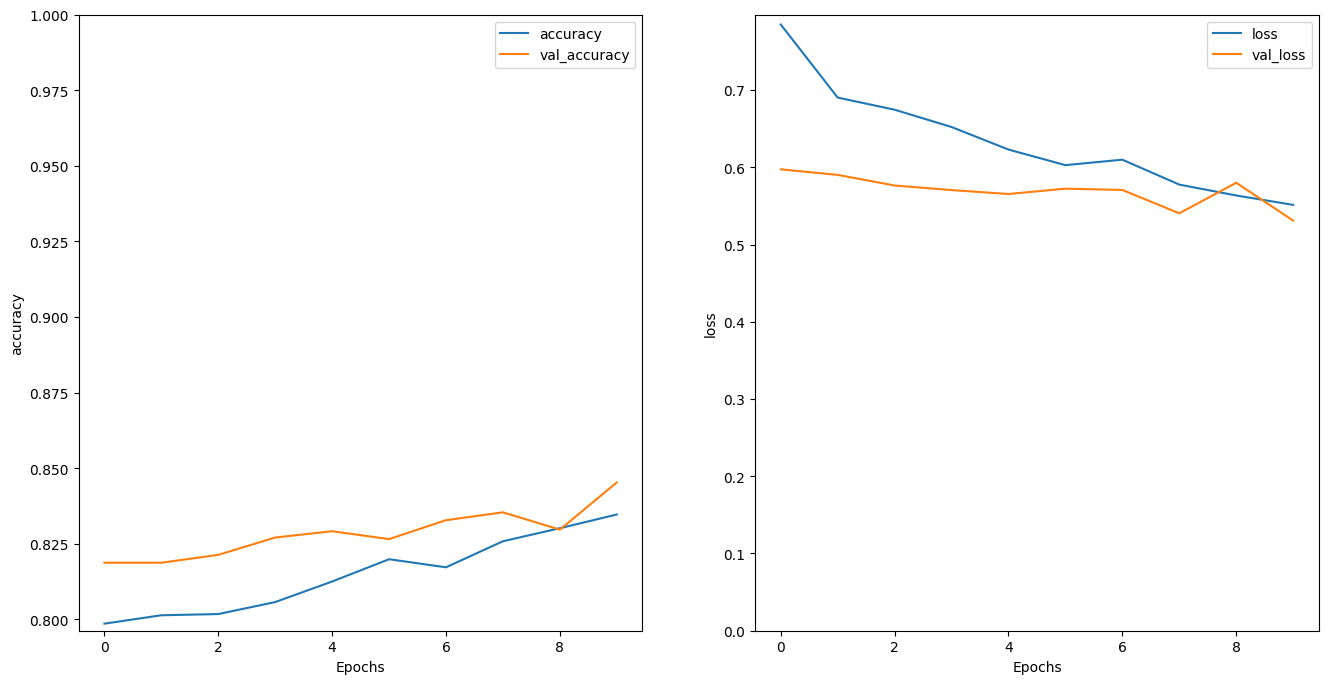

In [21]:
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)
plot_loss(history)

# TF-IDF (Term Frequency Inverse Document Frequency)

In [14]:
tf_idf_encoder = data.DataEncoder()

In [16]:
try:
    vec_X = tf_idf_encoder.vectorize_text_data(text, DataEncodings.TFIDF, sparse=False)
except ResourceExhaustedError:
    pass
# print(vectorizer.get_feature_names_out(vec_X))
# print(vectorizer.vocabulary_)
# print(vec_X.shape)
# print(vec_X)

2025-04-30 23:49:18.279478: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 16195382000 exceeds 10% of free system memory.
2025-04-30 23:49:28.495616: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:501] Allocator (GPU_0_bfc) ran out of memory trying to allocate 15.08GiB (rounded to 16195382016)requested by op Cast
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2025-04-30 23:49:28.495767: I external/local_xla/xla/tsl/framework/bfc_allocator.cc:1058] BFCAllocator dump for GPU_0_bfc
2025-04-30 23:49:28.495777: I external/local_xla/xla/tsl/framework/bfc_allocator.cc:1065] Bin (256): 	Total Chunks: 2871, Chunks in use: 2870. 717.8KiB allocated for chunks. 717.5KiB in use in bin. 12.1KiB client-requested in use in bin.
2025-04-30 23:49:28.495782: I external/local_xla/xla/tsl/framework/bfc_allocat

InternalError: Exception encountered when calling TextVectorization.call().

[1mFailed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run Cast: Dst tensor is not initialized. [Op:Cast] name: [0m

Arguments received by TextVectorization.call():
  • inputs=array(["Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes .",
       'Subject: hpl nom for january 9 , 2001\r\n( see attached file : hplnol 09 . xls )\r\n- hplnol 09 . xls',
       "Subject: neon retreat\r\nho ho ho , we ' re around to that most wonderful time of the year - - - neon leaders retreat time !\r\ni know that this time of year is extremely hectic , and that it ' s tough to think about anything past the holidays , but life does go on past the week of december 25 through january 1 , and that ' s what i ' d like you to think about for a minute .\r\non the calender that i handed out at the beginning of the fall semester , the retreat was scheduled for the weekend of january 5 - 6 . but because of a youth ministers conference that brad and dustin are connected with that week , we ' re going to change the date to the following weekend , january 12 - 13 . now comes the part you need to think about .\r\ni think we all agree that it ' s important for us to get together and have some time to recharge our batteries before we get to far into the spring semester , but it can be a lot of trouble and difficult for us to get away without kids , etc . so , brad came up with a potential alternative for how we can get together on that weekend , and then you can let me know which you prefer .\r\nthe first option would be to have a retreat similar to what we ' ve done the past several years . this year we could go to the heartland country inn ( www . . com ) outside of brenham . it ' s a nice place , where we ' d have a 13 - bedroom and a 5 - bedroom house side by side . it ' s in the country , real relaxing , but also close to brenham and only about one hour and 15 minutes from here . we can golf , shop in the antique and craft stores in brenham , eat dinner together at the ranch , and spend time with each other . we ' d meet on saturday , and then return on sunday morning , just like what we ' ve done in the past .\r\nthe second option would be to stay here in houston , have dinner together at a nice restaurant , and then have dessert and a time for visiting and recharging at one of our homes on that saturday evening . this might be easier , but the trade off would be that we wouldn ' t have as much time together . i ' ll let you decide .\r\nemail me back with what would be your preference , and of course if you ' re available on that weekend . the democratic process will prevail - - majority vote will rule ! let me hear from you as soon as possible , preferably by the end of the weekend . and if the vote doesn ' t go your way , no complaining allowed ( like i tend to do ! )\r\nhave a great weekend , great golf , great fishing , great shopping , or whatever makes you happy !\r\nbobby",
       ...,
       'Its a valentine game. . . send dis msg to all ur friends. . If 5 answers r d same then someone really loves u. . Ques- which colour suits me the best?',
       'We r outside already.',
       'The Xmas story is peace.. The Xmas msg is love.. The Xmas miracle is jesus.. Hav a blessed month ahead &amp; wish U Merry Xmas...'],
      dtype=object)

In [18]:
X_train, X_test, Y_train, Y_test = data.cross_validate_split(vec_X, text_class, test_size=0.1)

### Applying Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=0, max_iter=1000)
lr_model.fit(X_train, Y_train)
evaluate_model(lr_model, X_test, Y_test)

KeyboardInterrupt: 

### Applying Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train.toarray(), Y_train)
evaluate_model(nb_model, X_test.toarray(), Y_test)

Overall accuracy of model: 0.7549979600163199
Accuracy on classifying spam: 0.7111111111111111
Accuracy on identifying ham from spam: 0.765478898155168


### RNN

In [20]:
train_dataset, test_dataset = tensorflow_dataset(text, text_class)
VOCAB_SIZE = 1000
encoder = ks.layers.TextVectorization(
    max_tokens=VOCAB_SIZE,
    output_mode="tf_idf",
)
encoder.adapt(train_dataset.map(lambda text, label: text))

model = ks.Sequential([
    encoder,
    ks.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64),
    ks.layers.Bidirectional(ks.layers.LSTM(64)),
    ks.layers.Dense(64, activation='relu'),
    ks.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',  # Use categorical_crossentropy if your labels are one-hot encoded
              metrics=['accuracy'])

history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

test_loss, test_acc = model.evaluate(test_dataset)

Epoch 1/10


2025-04-30 23:50:49.042697: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


276/276 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.7780 - loss: 0.9588 - val_accuracy: 0.8188 - val_loss: 0.5973
Epoch 2/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step - accuracy: 0.7961 - loss: 0.7135 - val_accuracy: 0.8188 - val_loss: 0.5901
Epoch 3/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step - accuracy: 0.8033 - loss: 0.6820 - val_accuracy: 0.8214 - val_loss: 0.5764
Epoch 4/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 13s 48ms/step - accuracy: 0.7983 - loss: 0.6771 - val_accuracy: 0.8271 - val_loss: 0.5705
Epoch 5/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step - accuracy: 0.8064 - loss: 0.6413 - val_accuracy: 0.8292 - val_loss: 0.5654
Epoch 6/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 13s 48ms/step - accuracy: 0.8069 - loss: 0.6306 - val_accuracy: 0.8266 - val_loss: 0.5723
Epoch 7/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 13s 48ms/step - accuracy: 0.8133 - loss: 0.6146 - val_accuracy: 0.8328 - val_loss: 0.5706
Epoch 8/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 13s 48ms/step - accuracy: 0.8255 - loss: 0.5726 - val_accurac

Test Loss: 0.48395654559135437
Test Accuracy: 0.8424273133277893


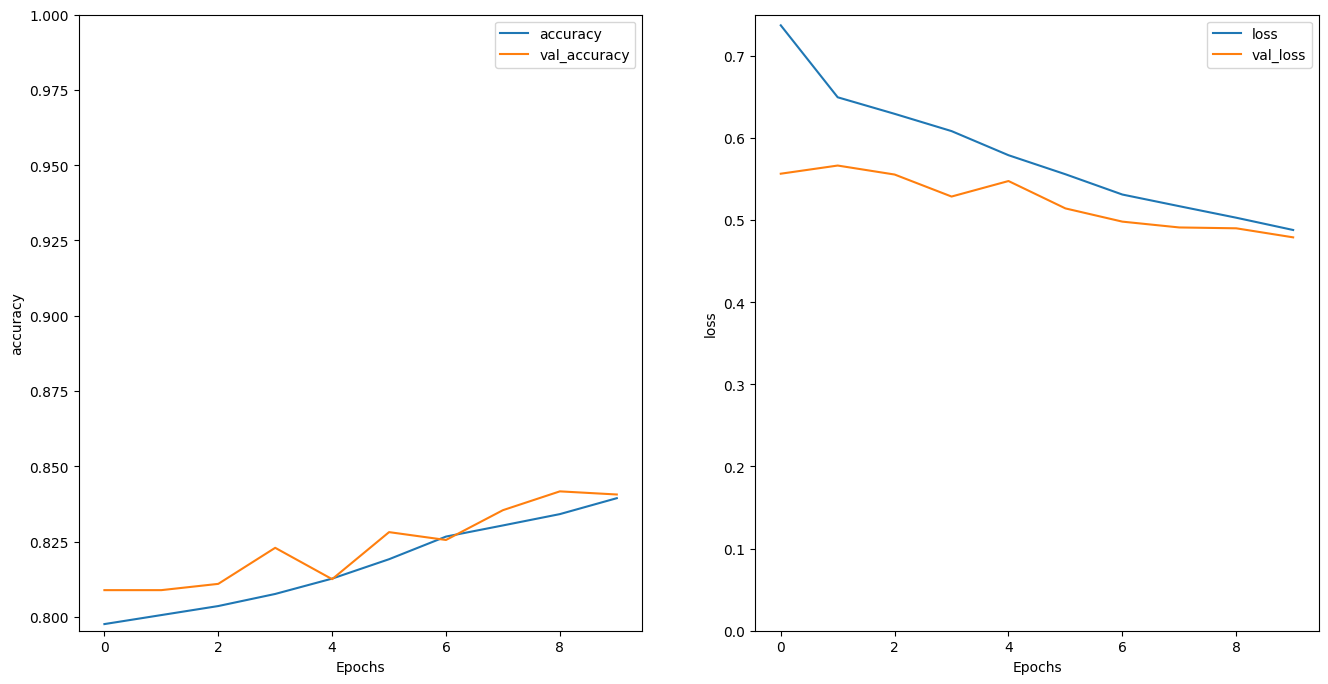

In [ ]:
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)
plot_loss(history)

# word2vec

In [22]:
data_encoder.train_word2vec_model(cleaned_text)

In [25]:
word2vec_vectors = data_encoder.get_word2vec_vectors(cleaned_text)

In [ ]:
X_train, X_test, Y_train, Y_test = data.cross_validate_split(word2vec_vectors, text_class, test_size=0.1)

### Applying Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=0, max_iter=1000)
lr_model.fit(X_train, Y_train)
evaluate_model(lr_model, X_test, Y_test)

Overall accuracy of model: 0.9592044875063743
Accuracy on classifying spam: 0.8133333333333334
Accuracy on identifying ham from spam: 0.9936948297604036


### Applying Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train.toarray(), Y_train)
evaluate_model(nb_model, X_test.toarray(), Y_test)

Overall accuracy of model: 0.760326364099949
Accuracy on classifying spam: 0.6666666666666666
Accuracy on identifying ham from spam: 0.7824716267339218


### RNN

In [26]:
train_dataset, test_dataset = tensorflow_dataset(word2vec_vectors, text_class)

model = ks.Sequential([
    ks.layers.Embedding(
        input_dim=data_encoder.word2vec_model.vector_size,
        output_dim=64),
    ks.layers.Bidirectional(ks.layers.LSTM(64)),
    ks.layers.Dense(64, activation='relu'),
    ks.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',  # Use categorical_crossentropy if your labels are one-hot encoded
              metrics=['accuracy'])

history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

test_loss, test_acc = model.evaluate(test_dataset)

Epoch 1/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7816 - loss: 0.9389 - val_accuracy: 0.8188 - val_loss: 0.7580
Epoch 2/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8004 - loss: 0.8048 - val_accuracy: 0.8188 - val_loss: 0.7720
Epoch 3/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7998 - loss: 0.8065 - val_accuracy: 0.8188 - val_loss: 0.7638
Epoch 4/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8005 - loss: 0.8031 - val_accuracy: 0.8188 - val_loss: 0.7546
Epoch 5/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7994 - loss: 0.8079 - val_accuracy: 0.8188 - val_loss: 0.7537
Epoch 6/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7992 - loss: 0.8090 - val_accuracy: 0.8188 - val_loss: 0.7685
Epoch 7/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7978 - loss: 0.8084 - val_accuracy: 0.8188 - val_loss: 0.7683
Epoch 8/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7998 - loss: 0.8051 - val_accuracy: 0.

Test Loss: 0.7218911647796631
Test Accuracy: 0.8138704895973206


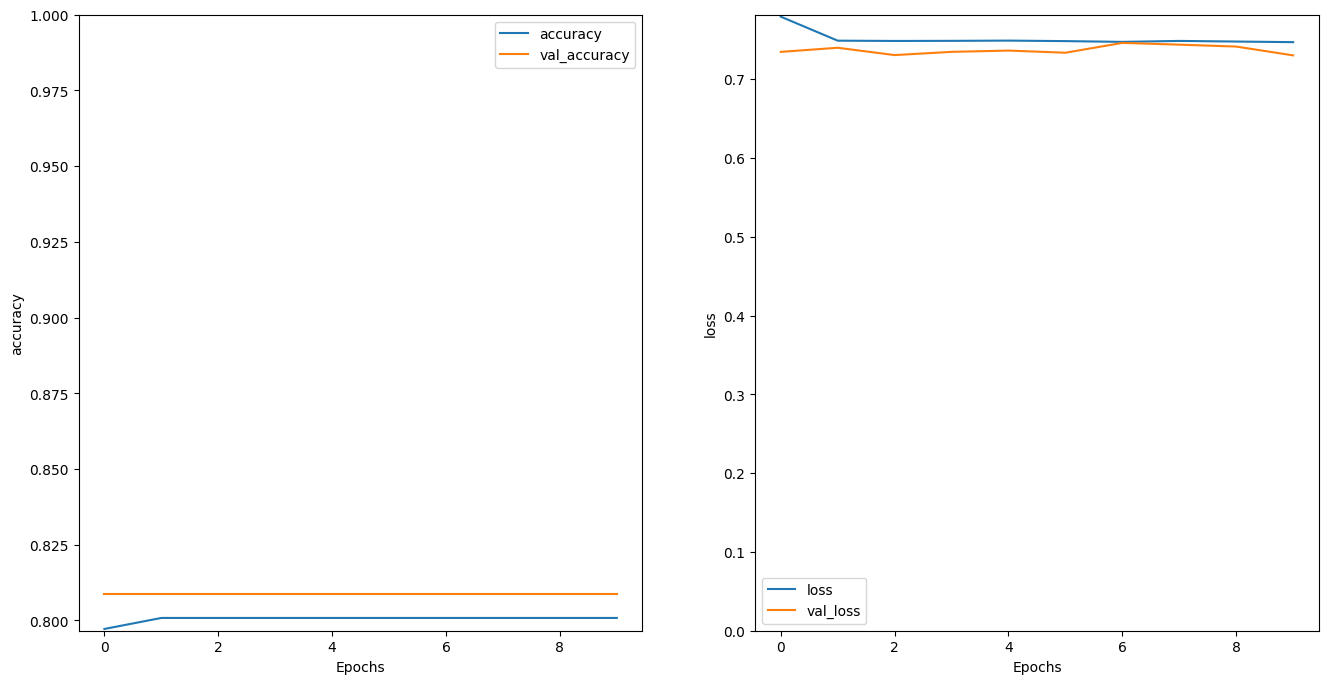

In [ ]:
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)
plot_loss(history)

# tokenize

In [ ]:
train_dataset, test_dataset = tensorflow_dataset(text, text_class)
VOCAB_SIZE = 1000
encoder = ks.layers.TextVectorization(
    max_tokens=VOCAB_SIZE,
)
encoder.adapt(train_dataset.map(lambda text, label: text))

model = ks.Sequential([
    encoder,
    ks.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64),
    ks.layers.Bidirectional(ks.layers.LSTM(64)),
    ks.layers.Dense(64, activation='relu'),
    ks.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',  # Use categorical_crossentropy if your labels are one-hot encoded
              metrics=['accuracy'])

history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

test_loss, test_acc = model.evaluate(test_dataset)

Epoch 1/10


2025-04-30 23:35:08.386433: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


246/246 ━━━━━━━━━━━━━━━━━━━━ 20s 74ms/step - accuracy: 0.8050 - loss: 0.7584 - val_accuracy: 0.8672 - val_loss: 0.3601
Epoch 2/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 18s 73ms/step - accuracy: 0.8892 - loss: 0.3538 - val_accuracy: 0.9198 - val_loss: 0.3035
Epoch 3/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 18s 74ms/step - accuracy: 0.9197 - loss: 0.2740 - val_accuracy: 0.9198 - val_loss: 0.3044
Epoch 4/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 18s 74ms/step - accuracy: 0.9278 - loss: 0.2455 - val_accuracy: 0.9375 - val_loss: 0.2243
Epoch 5/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 18s 74ms/step - accuracy: 0.9347 - loss: 0.2169 - val_accuracy: 0.9422 - val_loss: 0.2067
Epoch 6/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 18s 72ms/step - accuracy: 0.9408 - loss: 0.1942 - val_accuracy: 0.9453 - val_loss: 0.1986
Epoch 7/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 18s 71ms/step - accuracy: 0.9510 - loss: 0.1695 - val_accuracy: 0.9521 - val_loss: 0.1774
Epoch 8/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 18s 73ms/step - accuracy: 0.9502 - loss: 0.1728 - val_accurac

Test Loss: 0.16479842364788055
Test Accuracy: 0.9523202180862427


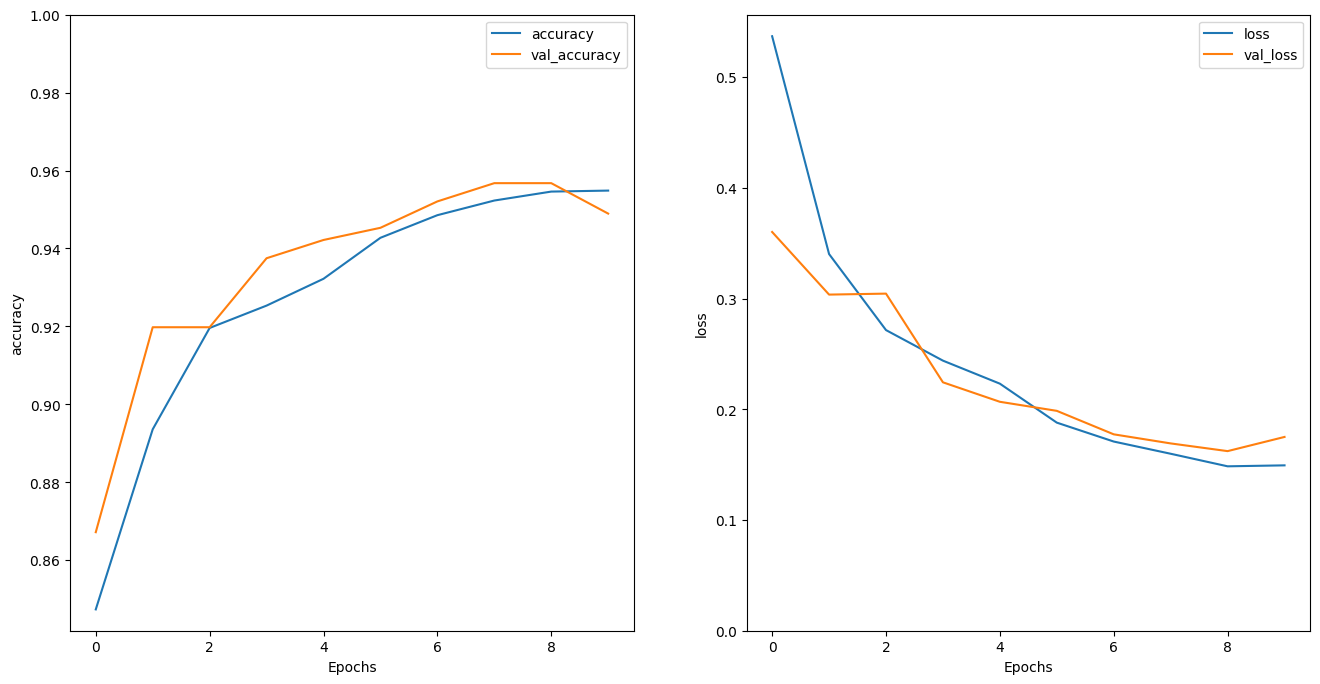

In [ ]:
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)
plot_loss(history)